#Kaggle dataset download
##Reqd -  saved best model and info from all models, check if data is getting standardized and rerun everything, run model with complete data, not just 

In [1]:
from google.colab import files
files.upload() #uploading api

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"apoorvb","key":"ea102443c4fe13d54fd20e037c3e8b02"}'}

In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c acea-water-prediction

  0% 0.00/431k [00:00<?, ?B/s]
100% 431k/431k [00:00<00:00, 64.7MB/s]
  0% 0.00/364k [00:00<?, ?B/s]
100% 364k/364k [00:00<00:00, 49.7MB/s]
  0% 0.00/258k [00:00<?, ?B/s]
100% 258k/258k [00:00<00:00, 85.4MB/s]
  0% 0.00/457k [00:00<?, ?B/s]
100% 457k/457k [00:00<00:00, 146MB/s]
  0% 0.00/10.2k [00:00<?, ?B/s]
100% 10.2k/10.2k [00:00<00:00, 9.96MB/s]
  0% 0.00/256k [00:00<?, ?B/s]
100% 256k/256k [00:00<00:00, 78.7MB/s]
  0% 0.00/901k [00:00<?, ?B/s]
100% 901k/901k [00:00<00:00, 126MB/s]
  0% 0.00/75.2k [00:00<?, ?B/s]
100% 75.2k/75.2k [00:00<00:00, 76.1MB/s]
  0% 0.00/100k [00:00<?, ?B/s]
100% 100k/100k [00:00<00:00, 52.8MB/s]
  0% 0.00/40.1k [00:00<?, ?B/s]
100% 40.1k/40.1k [00:00<00:00, 40.1MB/s]
  0% 0.00/475k [00:00<?, ?B/s]
100% 475k/475k [00:00<00:00, 153MB/s]


In [4]:
mv * /content/

mv: 'Aquifer_Auser.csv' and '/content/Aquifer_Auser.csv' are the same file
mv: 'Aquifer_Doganella.csv' and '/content/Aquifer_Doganella.csv' are the same file
mv: 'Aquifer_Luco.csv' and '/content/Aquifer_Luco.csv' are the same file
mv: 'Aquifer_Petrignano.csv' and '/content/Aquifer_Petrignano.csv' are the same file
mv: 'datasets_description.ods' and '/content/datasets_description.ods' are the same file
mv: 'datasets_description.xlsx' and '/content/datasets_description.xlsx' are the same file
mv: 'drive' and '/content/drive' are the same file
mv: 'kaggle.json' and '/content/kaggle.json' are the same file
mv: 'Lake_Bilancino.csv' and '/content/Lake_Bilancino.csv' are the same file
mv: 'River_Arno.csv' and '/content/River_Arno.csv' are the same file
mv: 'sample_data' and '/content/sample_data' are the same file
mv: 'Water_Spring_Amiata.csv' and '/content/Water_Spring_Amiata.csv' are the same file
mv: 'Water_Spring_Lupa.csv' and '/content/Water_Spring_Lupa.csv' are the same file
mv: 'Water_

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
!pip install odfpy 
from statsmodels.tsa.stattools import adfuller

     |████████████████████████████████| 727kB 8.5MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160691 sha256=d0de2e15a51e586713bd78435c65dcf63d5a78fc46f63115dd4c1fb73d3d0ba7
  Stored in directory: /root/.cache/pip/wheels/ce/6b/93/ec330f2991c5f1546abf640360e5a2022f76cb16e5d99ed2fd
Successfully built odfpy


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from keras import backend as K
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.inspection import permutation_importance

#RIVER 


##EDA

In [59]:
river = pd.read_csv('/content/River_Arno.csv')
river.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [60]:
river = river.dropna().reset_index()

In [62]:
river['Date'] = pd.to_datetime(river['Date'], dayfirst=True)
river.head()

,index,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,2191,2004-01-01,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84
1,2192,2004-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93
2,2193,2004-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61
3,2194,2004-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35
4,2195,2004-01-05,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44


In [ ]:
river.describe()

,index,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.00000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,2830.576803,2.867555,2.377429,2.362853,3.097806,2.255486,3.035737,2.54953,3.431818,2.090752,2.081975,2.428213,2.105956,2.519592,3.842947,16.047688,1.490282
std,369.675465,7.404714,6.458453,6.193672,8.201614,5.890147,8.537043,6.51870,8.960505,5.888406,6.335634,7.245808,6.391857,7.123253,9.614272,7.255555,0.557755
min,2191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.700000,0.980000
25%,2510.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.250000,1.090000
50%,2830.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.200000,1.335000
75%,3149.250000,0.800000,0.400000,0.800000,1.400000,0.800000,1.000000,1.00000,2.200000,0.400000,0.400000,0.650000,0.400000,0.800000,2.400000,21.900000,1.660000
max,3473.000000,56.000000,54.600000,53.800000,108.600000,50.400000,95.000000,63.00000,114.400000,56.600000,75.000000,123.200000,95.600000,77.400000,103.600000,30.950000,5.660000


Text(0.5, 1.0, 'Correlation among the variables')

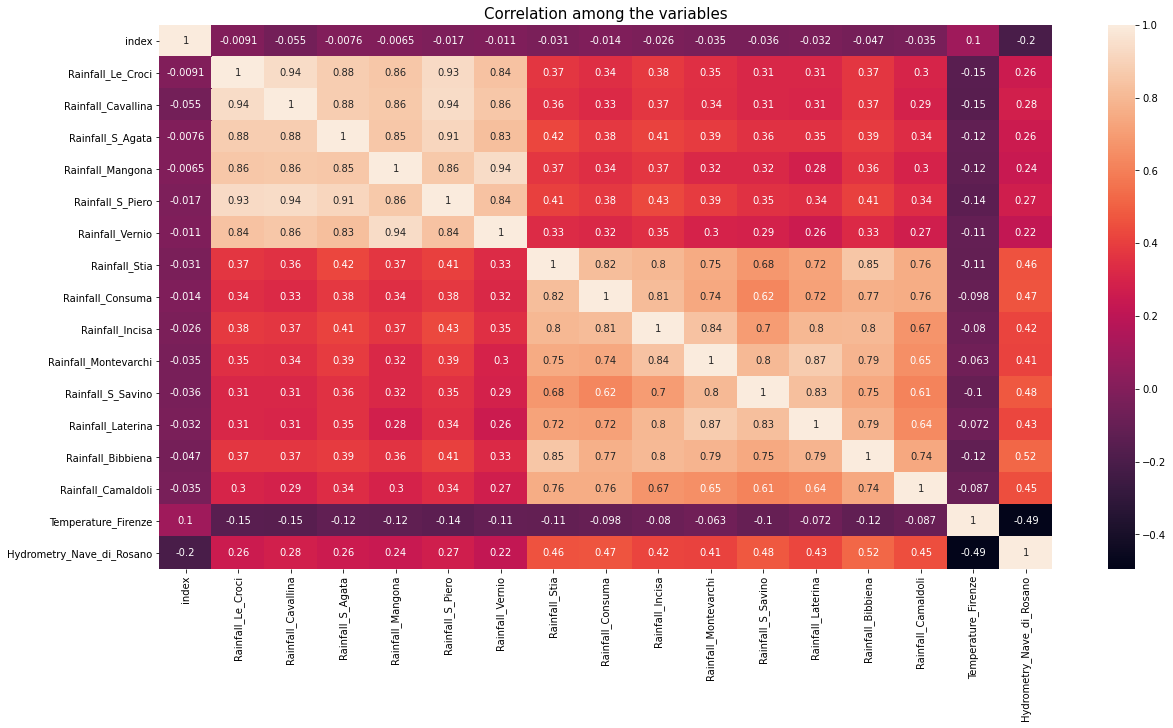

In [ ]:
correlation = river.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among the variables", size=15)

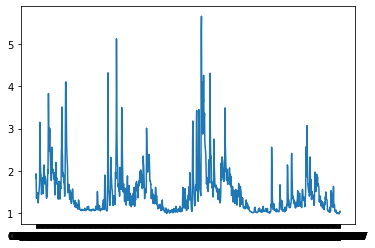

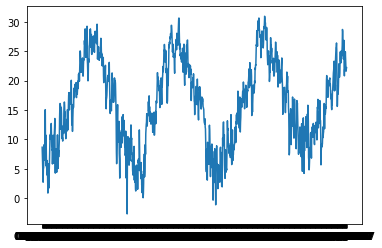

In [ ]:
plt.figure()
plt.plot(river['Date'], river['Hydrometry_Nave_di_Rosano'])
plt.figure()
plt.plot(river['Date'], river['Temperature_Firenze'])
plt.show()
#river.plot(x='Date', y=['Temperature_Firenze','Hydrometry_Nave_di_Rosano'], kind='scatter', figsize=(10,5), subplots=True)

Not to be used. just for refernce. How to run 3d plotting

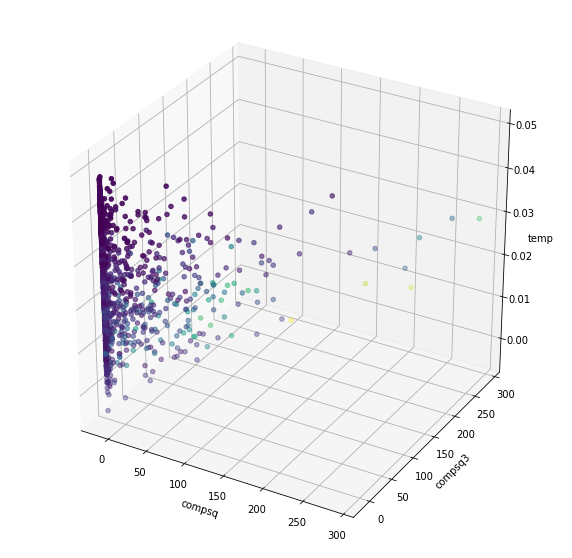

In [ ]:
###3D PLOTTING
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

fig = plt.figure(1,(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('compsq')
plt.ylabel('compsq3')
ax.set_zlabel('temp')
xval = np.array(analysis['comp_1'])
yval = np.array(analysis['comp_1'])
zval = preprocessing.normalize([np.array(analysis['Temperature_Firenze'])])
#zval = np.array(analysis['compsq2'])
ax.scatter(xval,yval,zval,
               c=analysis['Hydrometry_Nave_di_Rosano'])

##Features with ~0.5 corr 

In [11]:
col = (river.iloc[:,1:].corrwith(river['Hydrometry_Nave_di_Rosano'], axis=0) > 0.4
 ) | (
     river.iloc[:,1:].corrwith(river['Hydrometry_Nave_di_Rosano'], axis=0) < -0.4)

In [12]:
features = river.iloc[:,2:].loc[:,list(col)].copy().to_numpy()
target = river['Hydrometry_Nave_di_Rosano'].copy().to_numpy()

In [ ]:
col

#####PCA feature reduction - >0.4 corr

continued from previous features, targets


In [ ]:
features = river.iloc[:,2:].loc[:,list(col)].copy().to_numpy()
target = river['Hydrometry_Nave_di_Rosano'].copy().to_numpy()

In [ ]:
features = features[:,:-2]
features.shape

(1276, 8)

In [ ]:
scaler_rain = StandardScaler()
scaled_feat = scaler_rain.fit_transform(features)

In [ ]:
from sklearn.decomposition import PCA
# getting pca of combined rainfalls
pca = PCA(n_components=3)
components = pca.fit(scaled_feat)
print(sum(components.explained_variance_ratio_.round(2)))
#------------------
components = pca.fit_transform(scaled_feat)

0.9000000000000001


In [ ]:
features = np.concatenate((components,
                           river.iloc[:,-2:].copy().to_numpy()),
                              axis=1) 

##### tree regressor feature importance

In [ ]:
features = river.iloc[:,2:].loc[:,list(col)].copy().to_numpy()
target = river['Hydrometry_Nave_di_Rosano'].copy().to_numpy()

In [ ]:
estimator = RandomForestRegressor(n_estimators=500, random_state=1)
estimator.fit(features, features[:,-1])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
id = list(estimator.feature_importances_.argsort()[-5:])

In [ ]:
features = features[:,id]

#####RFE feature selection


In [13]:
features = river.iloc[:,2:].loc[:,list(col)].copy().to_numpy()
target = river['Hydrometry_Nave_di_Rosano'].copy().to_numpy()

In [14]:
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=5)
fit = rfe.fit(features, target)

In [15]:
names = river.iloc[:,2:].loc[:,list(col)].columns.values

In [16]:
for i in range(fit.support_.shape[0]):
	if fit.support_[i]:
		print(names[i])

Rainfall_Stia
Rainfall_Consuma
Rainfall_Laterina
Rainfall_Bibbiena
Hydrometry_Nave_di_Rosano


In [17]:
features = river.iloc[:,2:].loc[:,list(col)].loc[:,list(fit.support_)].copy().to_numpy()
target = river.iloc[:,-1].copy().to_numpy()

#####f regression 

In [ ]:
features = river.iloc[:,2:].loc[:,list(col)].copy().to_numpy()
target = river['Hydrometry_Nave_di_Rosano'].copy().to_numpy()

In [ ]:
f_test,_ = f_regression(features,target)

In [ ]:
f_test

array([ 3.37777100e+02,  3.53546456e+02,  2.68262787e+02,  2.60689321e+02,
        3.79267106e+02,  2.85608994e+02,  4.77950866e+02,  3.21273396e+02,
        4.11671967e+02, -1.79299560e+17])

In [ ]:
id = list(f_test.argsort()[:5])

array([9, 3, 2, 5, 7])

In [ ]:
features = features[:,id]

#####mutual info

In [ ]:
features = river.iloc[:,2:].loc[:,list(col)].copy().to_numpy()
target = river['Hydrometry_Nave_di_Rosano'].copy().to_numpy()

In [ ]:
mi = mutual_info_regression(features, target)

In [ ]:
mi

array([0.09924708, 0.08490832, 0.10589685, 0.07875096, 0.06786418,
       0.07498345, 0.09857643, 0.09805152, 0.42876643, 4.66935812])

In [ ]:
id = list(mi.argsort())[-5:]

In [ ]:
features = features[:,id]

##### permutation importance

In [ ]:
features = river.iloc[:,2:].loc[:,list(col)].copy().to_numpy()
target = river['Hydrometry_Nave_di_Rosano'].copy().to_numpy()

In [ ]:
estimator = RandomForestRegressor().fit(features, target)

In [ ]:
result = permutation_importance(estimator, features, target, n_repeats=10)

In [ ]:
result.importances_mean

array([ 2.47817305e-04,  4.87848289e-04, -1.60415208e-06,  7.99274258e-05,
        3.17526720e-05,  3.69836834e-05,  3.58733051e-04,  1.25202686e-04,
        7.34258641e-05,  1.95256276e+00])

In [ ]:
id = list(result.importances_mean.argsort())[-5:]

In [ ]:
features = features[:,id]

## Statistical test and model

In [ ]:
#run adfuller and remove non stationarity

## LSTM model - training and predicting

In [ ]:
#get features and targets

In [ ]:
features[:10,-1]

array([1.84, 1.93, 1.61, 1.35, 1.44, 1.42, 1.38, 1.37, 1.48, 1.45])

In [ ]:
target[:10]

array([1.84, 1.93, 1.61, 1.35, 1.44, 1.42, 1.38, 1.37, 1.48, 1.45])

In [52]:
''' model_type - 'feature_corr', 'pca_corr', 'tree_corr', 'rfe_corr', 'f_regression_corr', 
'mutual_info_corr', 'permutation_imp_corr'

This partitions features and targets in train/val/test set

For river, 27 day lag with rfe had best performing model.
'''
def training(X,Y,model_type):

  x, xtest, y, ytest = train_test_split(X, Y, test_size=0.5,
                                                shuffle=False)

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  xtrain, xval, ytrain, yval = train_test_split(x, x[:,-1], test_size=0.1,
                                                shuffle=False)
  xtest = scaler.transform(xtest)

  models = {}
  models[model_type] = {}
  lags = [6,13,27]
  for len in lags:
    train_generator = TimeseriesGenerator(xtrain, ytrain, length=len, sampling_rate=1, batch_size=32)
    val_generator = TimeseriesGenerator(xval, yval, length=len, sampling_rate=1, batch_size=32)
    test_generator = TimeseriesGenerator(xtest, ytest, length=len, sampling_rate=1, batch_size=1)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(64, activation='relu', input_shape=(len, xtrain.shape[1]), return_sequences=False))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(1))

    model.summary()

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min'
    )


    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.RootMeanSquaredError(),
                        tf.metrics.MeanAbsoluteError()]
    )


    history = model.fit(train_generator,
                      epochs=30,
                      validation_data=val_generator,
                      shuffle=False,
                      callbacks=[early_stopping])
    print('------------- EVALUATION -----------------')
    ypred = model.predict(test_generator)
    pred = np.repeat(ypred, xtrain.shape[1], axis=1)
    scaled = scaler.inverse_transform(pred)
    rounded = scaled[:,-1].round(2)

    test = ytest[-(ytest.shape[0]-len):]
    
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(test, rounded)

    print('RMSE = {}'.format(rmse.result().numpy()))

    models[model_type][len] = {}
    models[model_type][len]['prediction_metric'] = rmse.result().numpy()
    models[model_type][len]['history'] = history.history
    models[model_type][len]['forecast'] = pd.DataFrame.from_records([{'pred': rounded, 
                                                        'test': test}])
  return models

In [ ]:
pickle.dump(models,open('results_river_v2.pickle','wb'), protocol=pickle.HIGHEST_PROTOCOL)

## LSTM model predict plottings

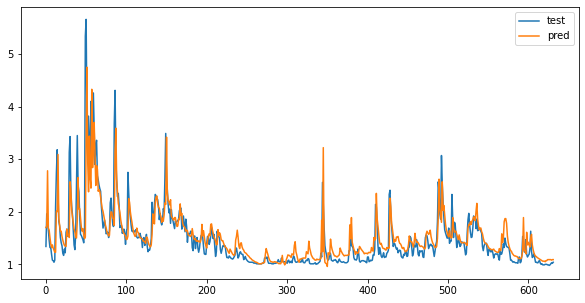

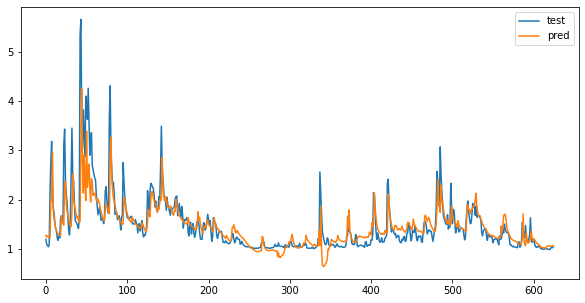

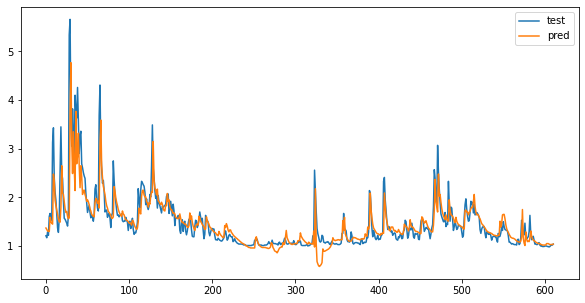

In [ ]:
for i in lags:
  models['feature_corr'][i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

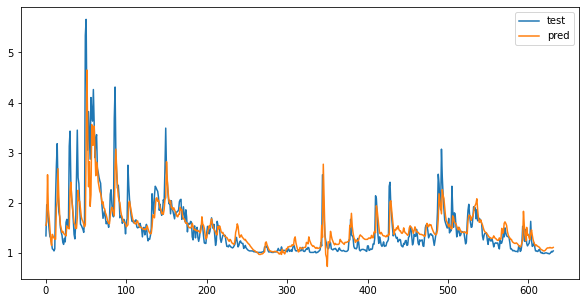

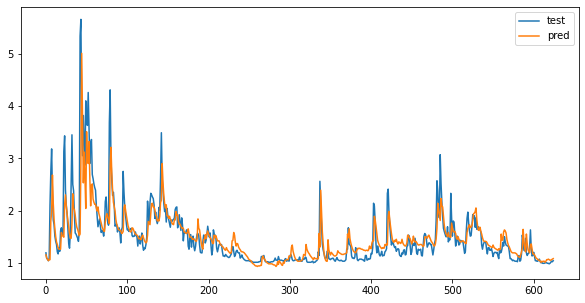

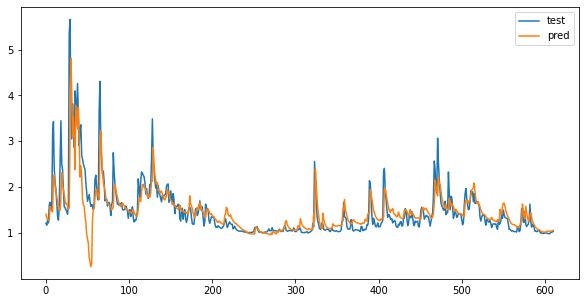

In [ ]:
for i in lags:
  models['pca_corr'][i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

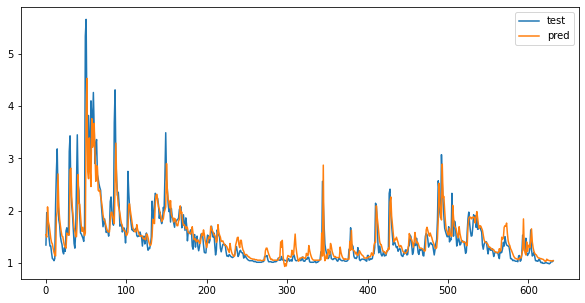

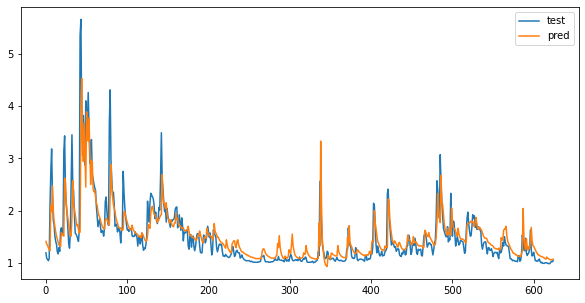

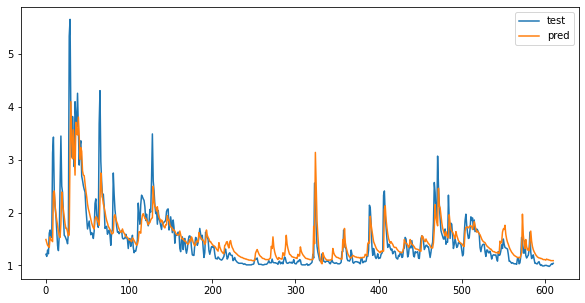

In [ ]:
for i in lags:
  models['tree_corr'][i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

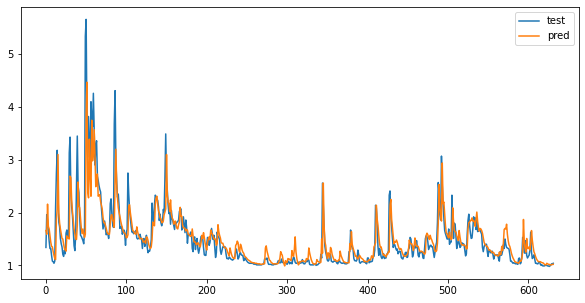

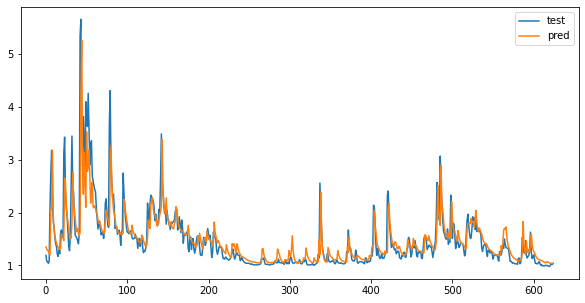

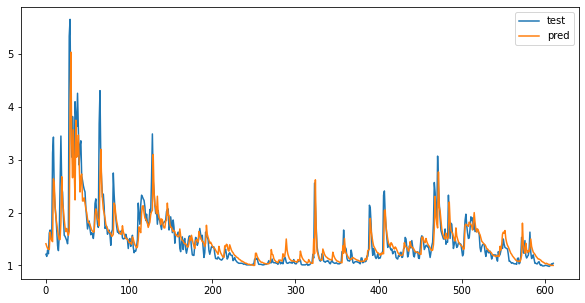

In [ ]:
for i in lags:
  models['rfe_corr'][i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

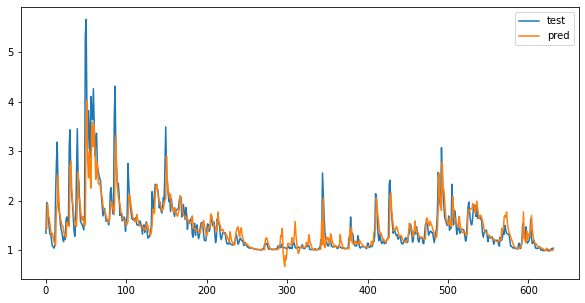

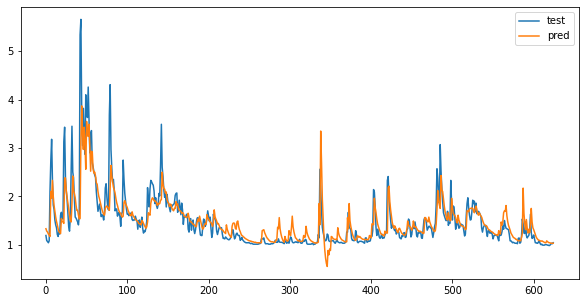

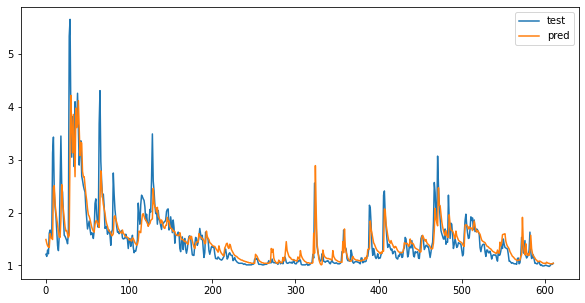

In [ ]:
for i in lags:
  models['f_regression_corr'][i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

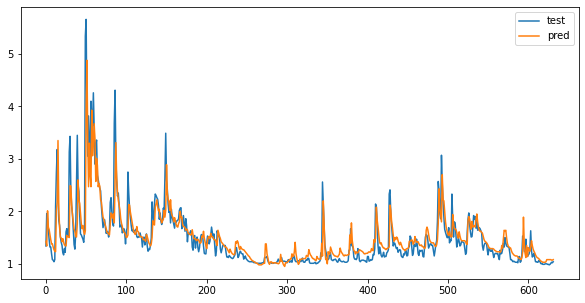

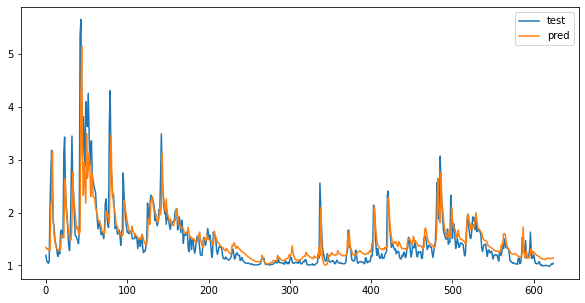

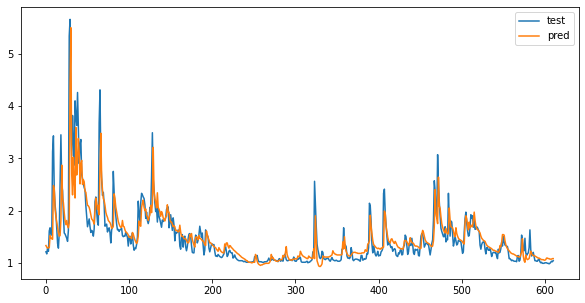

In [ ]:
for i in lags:
  models['mutual_info_corr'][i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

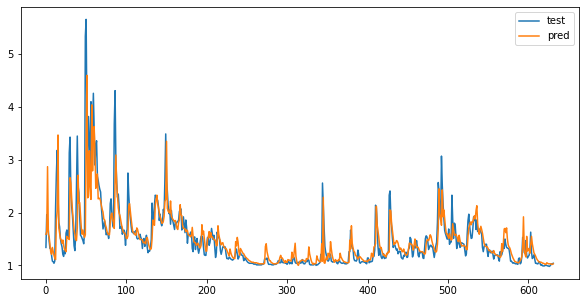

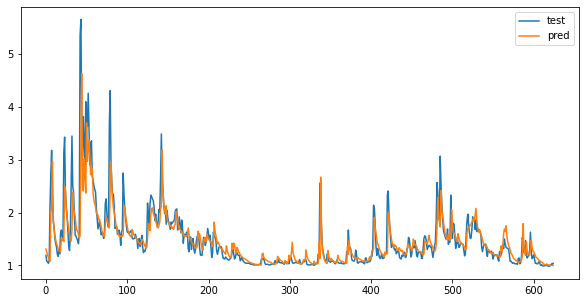

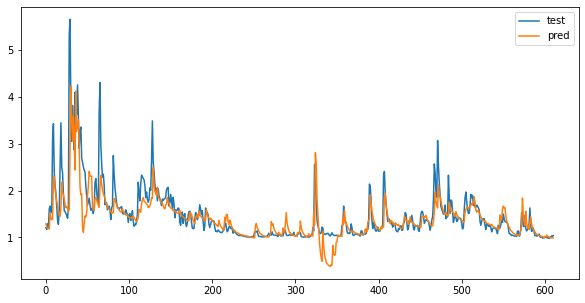

In [ ]:
for i in lags:
  models['permutation_imp_corr'][i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

##LSTM model loop and result saving 

In [63]:
def select_model(models):
  
  rmse = 1
  for key in models.keys():
    for len in models[key].keys():
      if models[key][len]['prediction_metric'] < rmse:
        rmse = models[key][len]['prediction_metric']
        final_model_type = model_type
        lag = len
  
  print('least RMSE - {}'.format(rmse))
  print('best model type - {}'.format(final_model_type))
  print('time steps - {}'.format(lag))

  return [final_model_type, lag]

In [ ]:
info = select_model(models)

In [ ]:
def loop_through_feature_selection_methods():
  #have functionality of all or selected method
  return {method - X,Y}

In [ ]:
X,Y = loop_through_feature.....

In [ ]:
path = 

In [ ]:
def final_model(X,Y, lag, path):
  
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  
  xtrain, xval, ytrain, yval = train_test_split(X, X[:,-1], test_size=0.15,
                                                shuffle=False)

  train_generator = TimeseriesGenerator(xtrain, ytrain, length=lag, sampling_rate=1, batch_size=32)
  val_generator = TimeseriesGenerator(xval, yval, length=lag, sampling_rate=1, batch_size=32)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(64, activation='relu', 
                                 input_shape=(len, xtrain.shape[1]), return_sequences=False))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(1))

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min'
  )

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.RootMeanSquaredError(),
                        tf.metrics.MeanAbsoluteError()]
  )
  
  history = model.fit(train_generator,
                      epochs=50,
                      validation_data=val_generator,
                      shuffle=False,
                      callbacks=[early_stopping])

  json.dump(history.history, open('river_{}_{}'.format(info[0]),'wb'))
  model.save(path)
  
  

In [ ]:
model = keras.models.load_model(path)
sample # let sample be the input features
sample, actual = loop_through_feature_selection_methods(info[0])
testgenerator = TimeseriesGenerator(sample, sample[:,-1], length=info[1], sampling_rate=1, batch_size=1)
new = model.predict(testgenerator)
#write comparison and plotting for new data

##model saving

In [ ]:
a = round(rmse.result().numpy(), 2)

In [ ]:
!pwd
!mkdir river
%cd river

/content/river


In [ ]:
model.save('/content/river/rfe_6features_rmse_0.31')

INFO:tensorflow:Assets written to: /content/river/rfe_6features_rmse_0.31/assets


In [ ]:
!rm -r *

##saving results

In [ ]:
models.keys()

dict_keys(['feature_corr', 'pca_corr', 'tree_corr', 'rfe_corr', 'f_regression_corr', 'mutual_info_corr', 'hydro', 'permutation_imp_corr'])

In [ ]:
models['feature_corr'][6]['history']

In [ ]:
%cd results

/content/results


In [57]:
import pickle

In [ ]:
#contains results(predictions, original and history) 
#for different feature selection methods
# lags = 6,13,29(week, fortnight, month)
pickle.dump(models,open('results_river_v1_nonscaled.json','wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!cp -r river/ drive/MyDrive/

In [ ]:
#### saved best mode

# LAKE - non nan EDA

In [ ]:
ls

Aquifer_Auser.csv          kaggle.json
Aquifer_Doganella.csv      Lake_Bilancino.csv
Aquifer_Luco.csv           River_Arno.csv
Aquifer_Petrignano.csv     sample_data/
datasets_description.ods   Water_Spring_Amiata.csv
datasets_description.xlsx  Water_Spring_Lupa.csv
drive/                     Water_Spring_Madonna_di_Canneto.csv


In [ ]:
lake = pd.read_csv('Lake_Bilancino.csv')

In [ ]:
#info = pd.read_excel('datasets_description.xlsx', sheet_name=None)
print(info['Datasets_Description'].iloc[6])
info['Datasets_Feature_Description'][55:62]

Database                                         Lake_Bilancino 
Description    Information about Bilancino Lake. It is an art...
Output                                   Lake_Level, \nFlow_Rate
Name: 6, dtype: object


,AUSER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
55,BILANCINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Field,Format,Description,NaN,NaN,NaN,NaN,NaN
57,Date,Daily Date,Uniquely identifies a day (Primary Key),NaN,NaN,NaN,Code,Values
58,Rainfall_X,Real Number,"It indicates the quantity of rain falling, exp...",NaN,NaN,NaN,X,"Le_Croci, Cavallina, S_Agata, Mangona, S_Piero"
59,Temperature_Y,Real Number,"It indicates the temperature, expressed in °C,...",NaN,NaN,NaN,Y,Le_Croci
60,Flow_Rate,Real Number,"It indicates the lake's flow rate, expressed i...",NaN,NaN,NaN,NaN,NaN
61,Lake_Level,Real Number,"It indicates the river level, expressed in met...",NaN,NaN,NaN,NaN,NaN


In [ ]:
print(info['Datasets_Feature_Description']['Unnamed: 2'][58])
print(info['Datasets_Feature_Description']['Unnamed: 2'][59])
print(info['Datasets_Feature_Description']['Unnamed: 2'][60])
print(info['Datasets_Feature_Description']['Unnamed: 2'][61])

It indicates the quantity of rain falling, expressed in millimeters (mm), in the area X
It indicates the temperature, expressed in °C, detected by the thermometric station Y
It indicates the lake's flow rate, expressed in cubic meters per seconds (mc/s)
It indicates the river level, expressed in meters (m)


In [ ]:
lake.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [ ]:
lake = lake.dropna().reset_index()

In [ ]:
print(lake.shape)

(6025, 10)


In [ ]:
lake.head()

,index,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,578,02/01/2004,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
1,579,03/01/2004,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
2,580,04/01/2004,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
3,581,05/01/2004,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
4,582,06/01/2004,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5


In [ ]:
lake.describe()

,index,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000
mean,3590.000000,2.471635,3.341212,2.670440,2.675187,3.130390,14.530141,249.553472,2.778204
std,1739.412018,6.650488,8.903769,7.167178,7.656404,8.025686,6.944029,2.183334,4.131176
min,578.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.450000
25%,2084.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,247.930000,0.600000
50%,3590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.240000,1.500000
75%,5096.000000,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.370000,3.000000
max,6602.000000,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


Text(0.5, 1.0, 'Correlation among the variables')

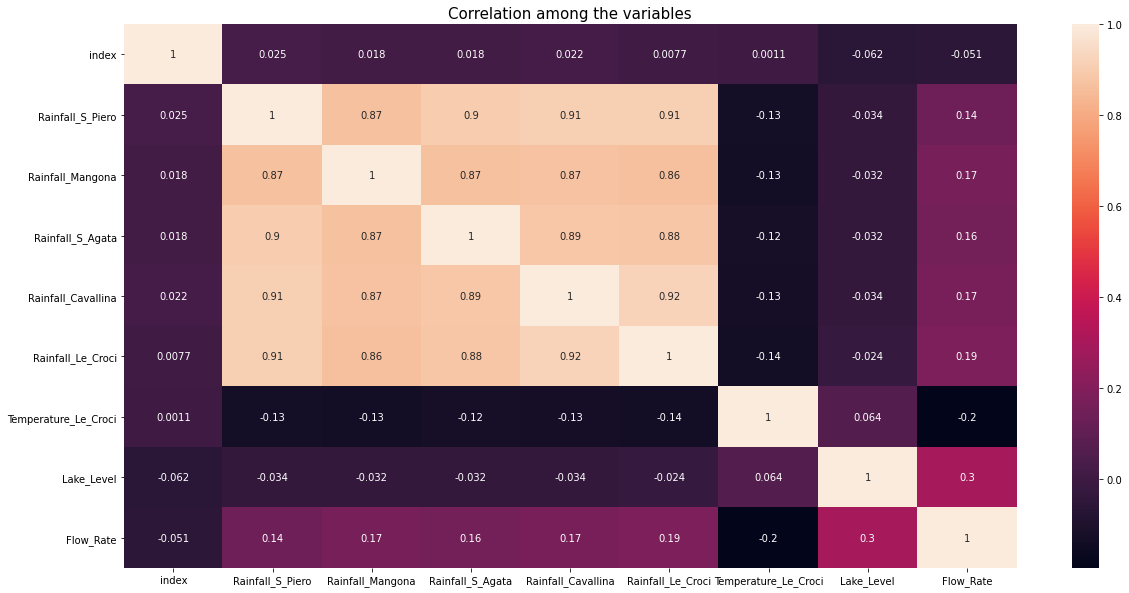

In [ ]:
correlation = lake.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among the variables", size=15)

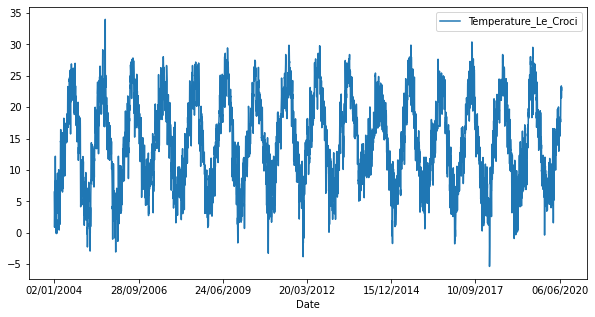

In [ ]:
lake.plot(x='Date', y='Temperature_Le_Croci', kind='line', figsize=(10,5))

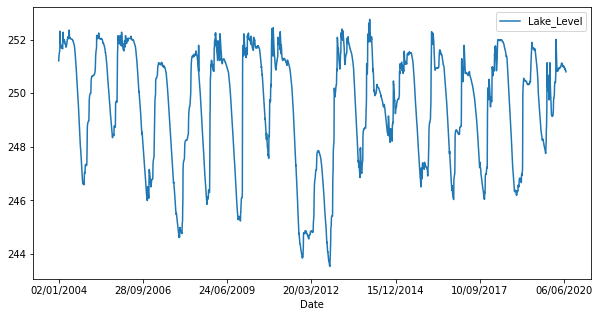

In [ ]:
lake.plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))

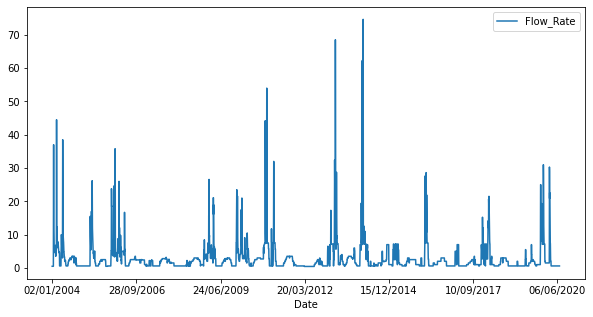

In [ ]:
lake.plot(x='Date', y='Flow_Rate', kind='line', figsize=(10,5))

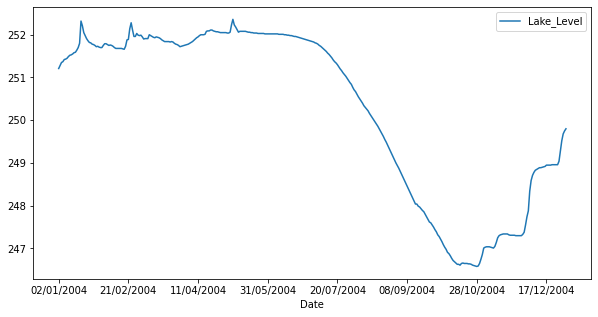

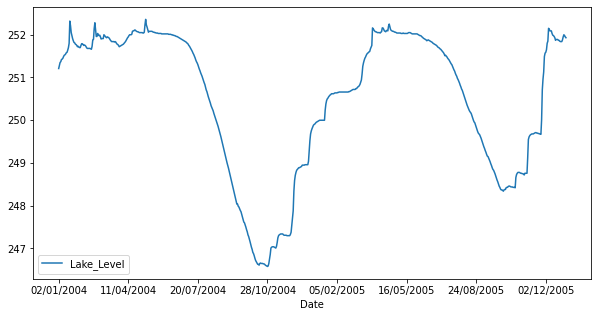

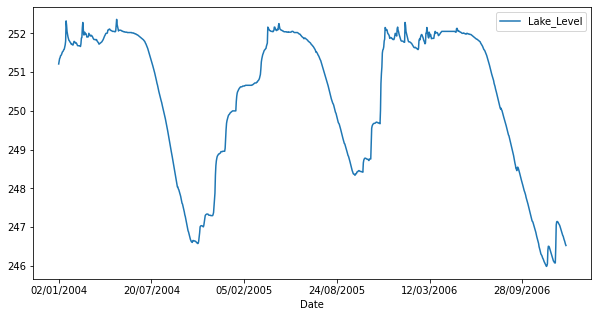

In [ ]:
lake[0:365].plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))
lake[0:730].plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))
lake[0:1095].plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))

In [ ]:
test_hydro=adfuller(lake['Lake_Level'])
for i in test_hydro:
  print(i)
#non stationary

-5.699711266094059
7.726366762783402e-07
27
5997
{'1%': -3.4314408956603097, '5%': -2.8620220755599486, '10%': -2.5670266063699962}
-11659.833479862486


In [ ]:
lake['total_rain'] = lake.iloc[:,2:7].sum(axis=1)

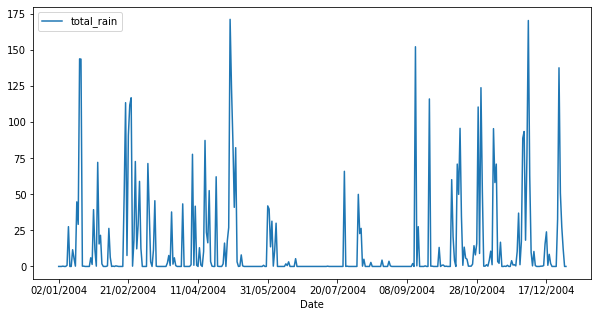

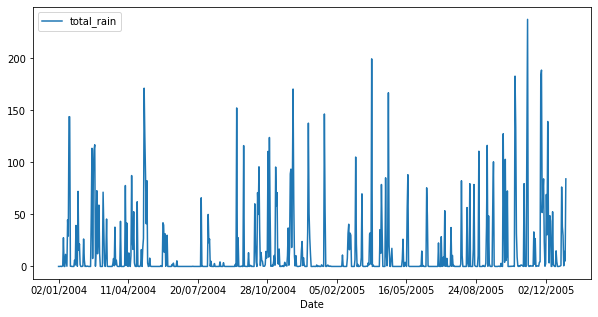

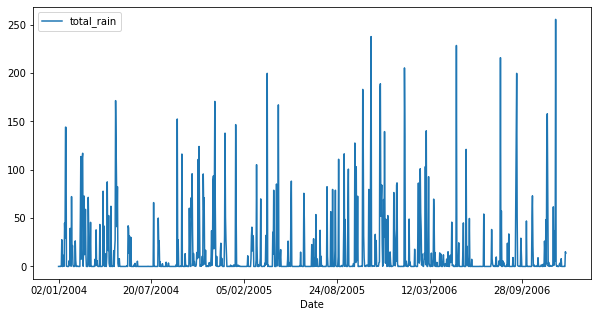

In [ ]:
lake[0:365].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))
lake[0:730].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))
lake[0:1095].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))

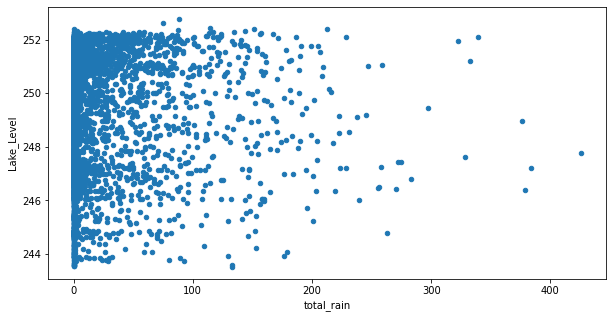

In [ ]:
lake.plot(x='total_rain', y='Lake_Level', kind='scatter', figsize=(10,5))

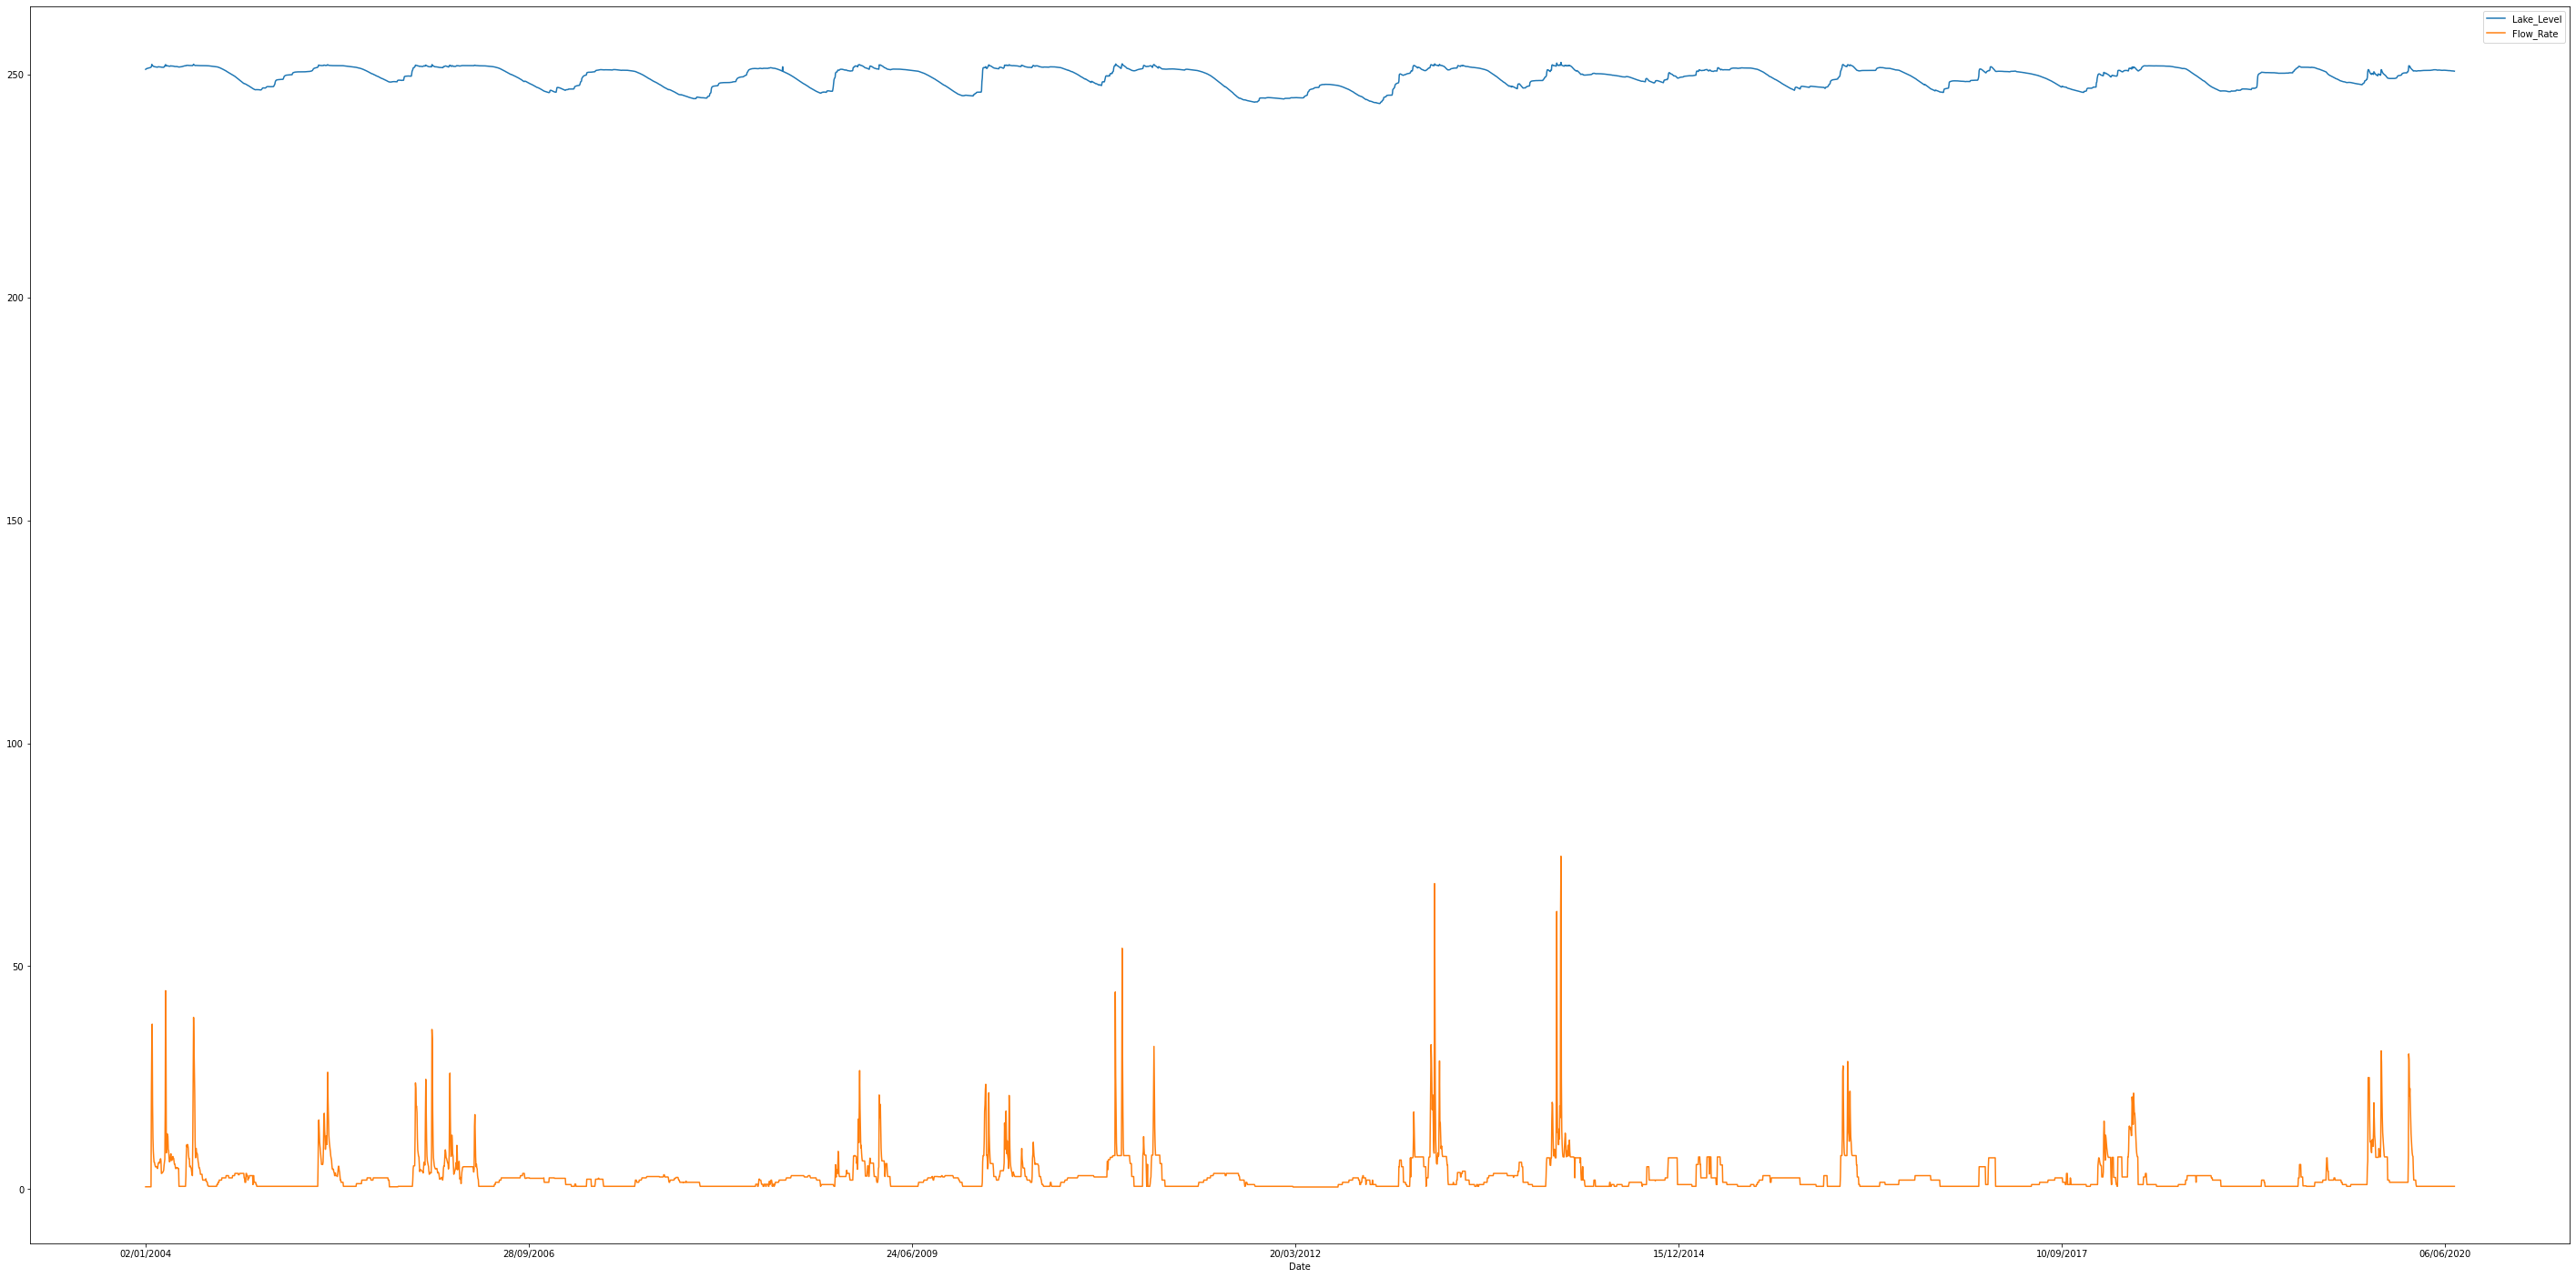

In [ ]:
lake.plot(x='Date', y=['Lake_Level', 'Flow_Rate'], kind='line', figsize=(50,25))

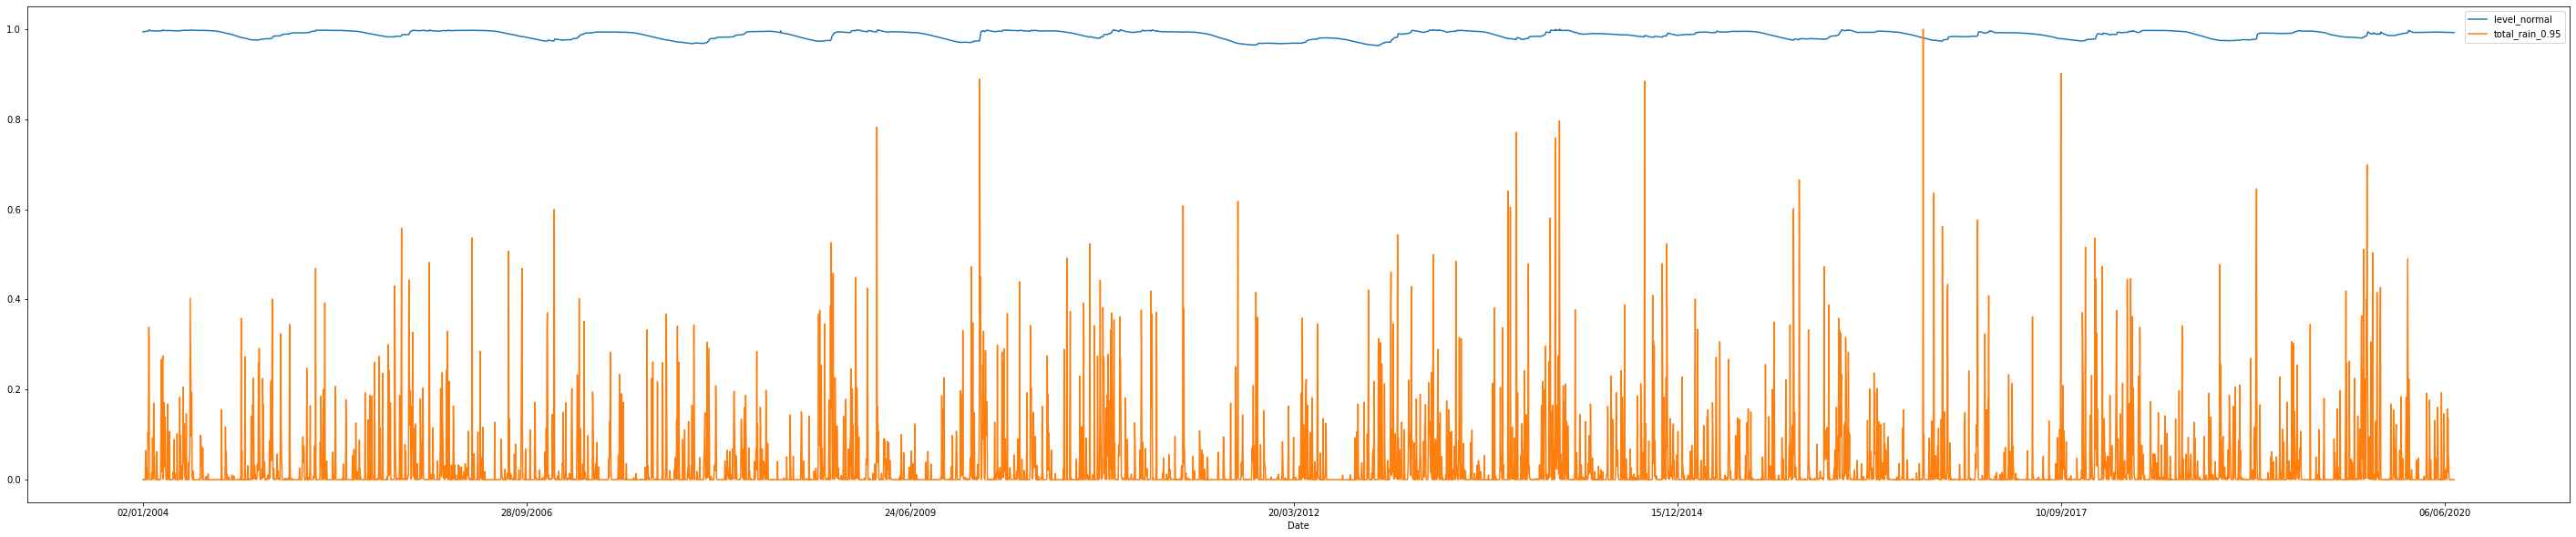

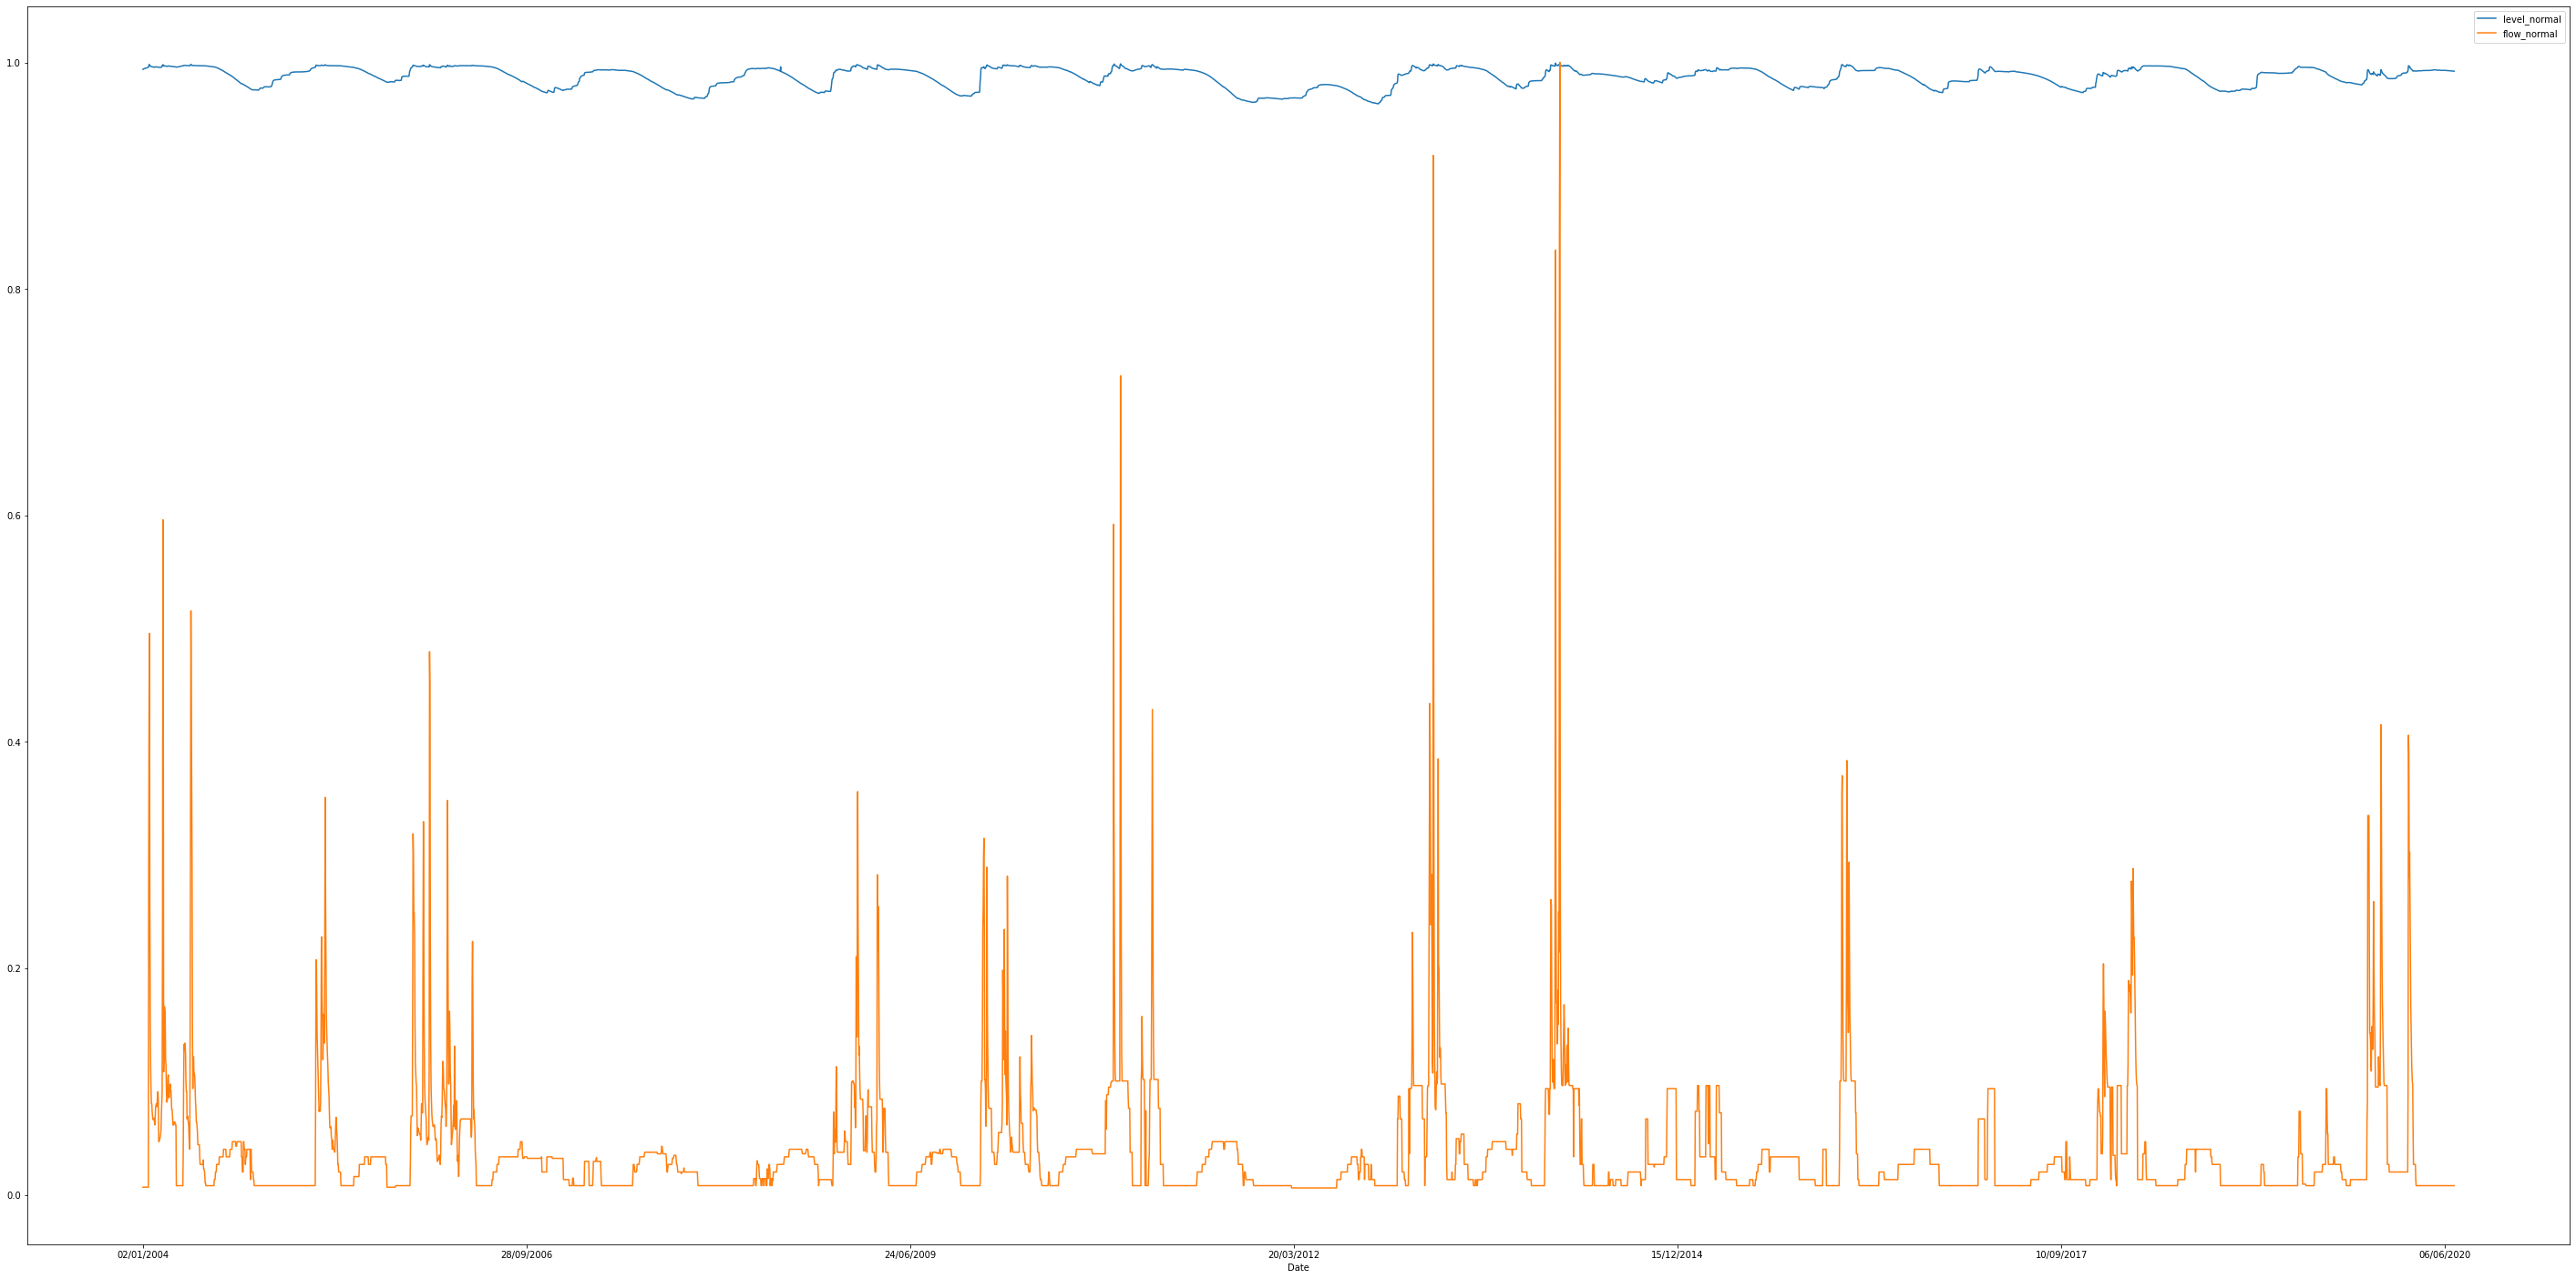

In [ ]:
lake['total_rain_0.95'] = lake['total_rain']/lake.total_rain.quantile(1)
#lake['total_rain_0.75'] = lake['total_rain']/lake.total_rain.quantile(0.75)
lake['level_normal'] = lake['Lake_Level']/lake.Lake_Level.max()
lake['flow_normal'] = lake['Flow_Rate']/lake.Flow_Rate.max()
for i in ['total_rain_0.95']:
  lake.plot(x='Date', y=['level_normal', i]
           , kind='line', figsize=(50,10))
lake.plot(x='Date', y=['level_normal', 'flow_normal'], kind='line', figsize=(50,25))

#SPRING - non nan EDA

In [ ]:
lupa = pd.read_csv('Water_Spring_Lupa.csv')

In [ ]:
madona = pd.read_csv('/content/Water_Spring_Madonna_di_Canneto.csv')

In [ ]:
amiata = pd.read_csv('/content/Water_Spring_Amiata.csv')

In [ ]:
for i in [lupa, madona, amiata]:
  print(i.columns)

Index(['Date', 'Rainfall_Terni', 'Flow_Rate_Lupa'], dtype='object')
Index(['Date', 'Rainfall_Settefrati', 'Temperature_Settefrati',
       'Flow_Rate_Madonna_di_Canneto'],
      dtype='object')
Index(['Date', 'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta'],
      dtype='object')


#AQUIFER - non nan EDA

In [ ]:
auser = pd.read_csv('/content/Aquifer_Auser.csv')
doga =  pd.read_csv('/content/Aquifer_Doganella.csv')
luco =  pd.read_csv('/content/Aquifer_Luco.csv')
petri =  pd.read_csv('/content/Aquifer_Petrignano.csv')

In [ ]:
for i in [auser, doga, luco, petri]:
  print(i.columns)

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')
Index(['Date', 'Rainfall_Monteporzio', 'Rainfall_Velletri',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Dept